In [4]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
from tkinter import messagebox
import os
import cv2
from numpy import result_type
from skimage.metrics import structural_similarity as ssim

def match(path1, path2):
    # read the images
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    # turn images to grayscale
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # resize images for comparison
    img1 = cv2.resize(img1, (300, 300))
    img2 = cv2.resize(img2, (300, 300))
    # display both images
    cv2.imshow("One", img1)
    cv2.imshow("Two", img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    similarity_value = "{:.2f}".format(ssim(img1, img2)*100)
    # print("answer is ", float(similarity_value),
    #       "type=", type(similarity_value))
    return float(similarity_value)
# Mach Threshold
THRESHOLD = 85

def browsefunc(ent):
    filename = askopenfilename(filetypes=([
        ("image", ".jpeg"),
        ("image", ".png"),
        ("image", ".jpg"),
    ]))
    ent.delete(0, tk.END)
    ent.insert(tk.END, filename)  # add this


def capture_image_from_cam_into_temp(sign=1):
    cam = cv2.VideoCapture(0, cv2.CAP_DSHOW)

    cv2.namedWindow("test")

    # img_counter = 0

    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break
        cv2.imshow("test", frame)

        k = cv2.waitKey(1)
        if k % 256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k % 256 == 32:
            # SPACE pressed
            if not os.path.isdir('temp'):
                os.mkdir('temp', mode=0o777)  # make sure the directory exists
            # img_name = "./temp/opencv_frame_{}.png".format(img_counter)
            if(sign == 1):
                img_name = "./temp/test_img1.png"
            else:
                img_name = "./temp/test_img2.png"
            print('imwrite=', cv2.imwrite(filename=img_name, img=frame))
            print("{} written!".format(img_name))
            # img_counter += 1
    cam.release()
    cv2.destroyAllWindows()
    return True


def captureImage(ent, sign=1):
    if(sign == 1):
        filename = os.getcwd()+'\\temp\\test_img1.png'
    else:
        filename = os.getcwd()+'\\temp\\test_img2.png'
    # messagebox.showinfo(
    #     'SUCCESS!!!', 'Press Space Bar to click picture and ESC to exit')
    res = None
    res = messagebox.askquestion(
        'Click Picture', 'Press Space Bar to click picture and ESC to exit')
    if res == 'yes':
        capture_image_from_cam_into_temp(sign=sign)
        ent.delete(0, tk.END)
        ent.insert(tk.END, filename)
    return True


def checkSimilarity(window, path1, path2):
    result = match(path1=path1, path2=path2)
    if(result <= THRESHOLD):
        messagebox.showerror("Failure: Signatures Do Not Match",
                             "Signatures are "+str(result)+f" % similar!!")
        pass
    else:
        messagebox.showinfo("Success: Signatures Match",
                            "Signatures are "+str(result)+f" % similar!!")
    return True


root = tk.Tk()
root.title("Signature Matching")
root.geometry("500x700")  # 300x200
uname_label = tk.Label(root, text="Compare Two Signatures:", font=10)
uname_label.place(x=90, y=50)

img1_message = tk.Label(root, text="Signature 1", font=10)
img1_message.place(x=10, y=120)

image1_path_entry = tk.Entry(root, font=10)
image1_path_entry.place(x=150, y=120)

img1_capture_button = tk.Button(
    root, text="Capture", font=10, command=lambda: captureImage(ent=image1_path_entry, sign=1))
img1_capture_button.place(x=400, y=90)

img1_browse_button = tk.Button(
    root, text="Browse", font=10, command=lambda: browsefunc(ent=image1_path_entry))
img1_browse_button.place(x=400, y=140)

image2_path_entry = tk.Entry(root, font=10)
image2_path_entry.place(x=150, y=240)

img2_message = tk.Label(root, text="Signature 2", font=10)
img2_message.place(x=10, y=250)

img2_capture_button = tk.Button(
    root, text="Capture", font=10, command=lambda: captureImage(ent=image2_path_entry, sign=2))
img2_capture_button.place(x=400, y=210)

img2_browse_button = tk.Button(
    root, text="Browse", font=10, command=lambda: browsefunc(ent=image2_path_entry))
img2_browse_button.place(x=400, y=260)

compare_button = tk.Button(
    root, text="Compare", font=10, command=lambda: checkSimilarity(window=root,
                                                                   path1=image1_path_entry.get(),
                                                                   path2=image2_path_entry.get(),))

compare_button.place(x=200, y=320)
root.mainloop()

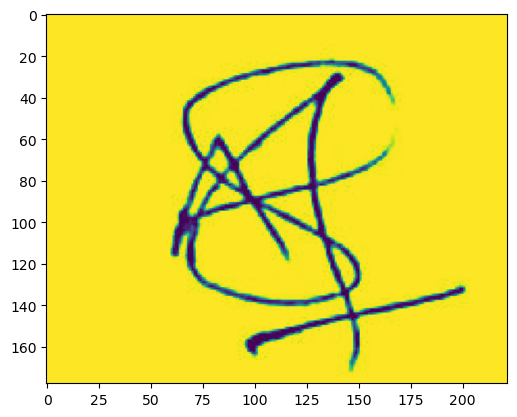

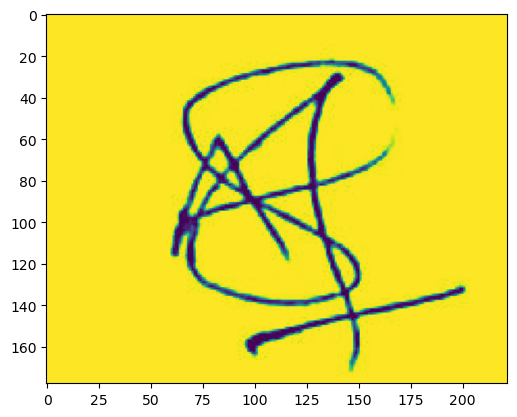

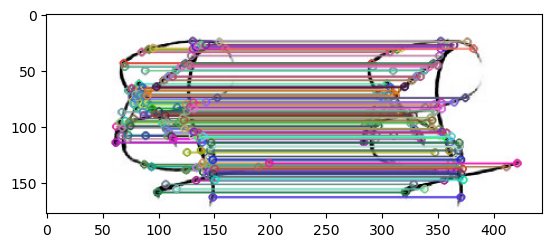

1.0


C:\Users\vigne\AppData\Local\Temp\ipykernel_15632\3013282532.py:27: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score=ssim(reference_signature,signature_to_verify,multichannel=True)


In [51]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
reference_signature = cv2.imread('D:/lib/signature/Train/01/2.jpg')
signature_to_verify = cv2.imread('D:/lib/signature/Train/01/2.jpg')
reference_signature=cv2.cvtColor(reference_signature,cv2.COLOR_BGR2GRAY)
signature_to_verify=cv2.cvtColor(signature_to_verify,cv2.COLOR_BGR2GRAY)
(h,w)=reference_signature.shape
signature_to_verify=cv2.resize(signature_to_verify,(w,h))
plt.imshow(reference_signature)
plt.show()
plt.imshow(signature_to_verify)
plt.show()
sift = cv2.SIFT_create()
keypoints_reference,descriptors_reference = sift.detectAndCompute(reference_signature,None)
keypoints_to_verify,descriptors_to_verify = sift.detectAndCompute(signature_to_verify,None)
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors_reference,descriptors_to_verify,k=2)
good_matches=[]
for i,j in matches:
    if i.distance<(0.6*j.distance):
        good_matches.append(i)
result=cv2.drawMatches(reference_signature,keypoints_reference,signature_to_verify,keypoints_to_verify,
                      good_matches,None)
plt.imshow(result)
plt.show()
score=ssim(reference_signature,signature_to_verify,multichannel=True)
print(score)

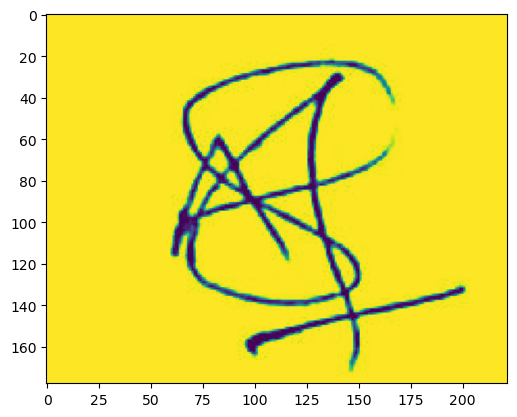

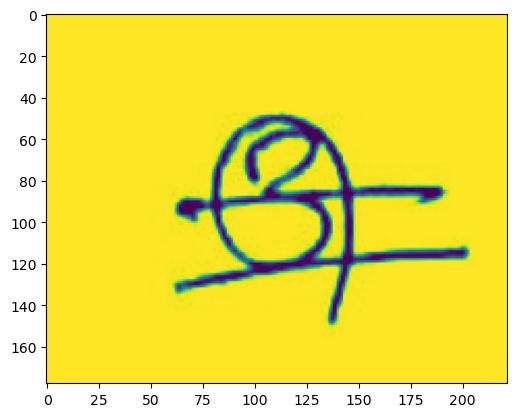

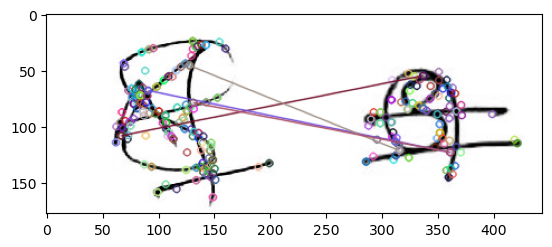

0.7287040581270327


C:\Users\vigne\AppData\Local\Temp\ipykernel_15632\2516733343.py:27: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score=ssim(reference_signature,signature_to_verify,multichannel=True)


In [49]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
reference_signature =cv2.imread('D:/lib/signature/Train/01/2.jpg')
reference_signature=cv2.cvtColor(reference_signature,cv2.COLOR_BGR2GRAY)
signature_to_verify =cv2.imread('D:/lib/signature/Train/02/3.jpg')
signature_to_verify=cv2.cvtColor(signature_to_verify,cv2.COLOR_BGR2GRAY)
(h,w)=reference_signature.shape
signature_to_verify=cv2.resize(signature_to_verify,(w,h))
plt.imshow(reference_signature)
plt.show()
plt.imshow(signature_to_verify)
plt.show()
sift = cv2.SIFT_create()
keypoints_reference,descriptors_reference = sift.detectAndCompute(reference_signature,None)
keypoints_to_verify,descriptors_to_verify = sift.detectAndCompute(signature_to_verify,None)
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors_reference,descriptors_to_verify,k=2)
good_matches=[]
for i,j in matches:
    if i.distance<(0.6*j.distance):
        good_matches.append(i)
result=cv2.drawMatches(reference_signature,keypoints_reference,signature_to_verify,keypoints_to_verify,
                      good_matches,None)
plt.imshow(result)
plt.show()
score=ssim(reference_signature,signature_to_verify,multichannel=True)
print(score)

sift = cv2.xfeatures2d.SIFT_create()
original_keypoints, original_descriptor = sift.detectAndCompute(gray_face, None)
query_keypoints, query_descriptor = sift.detectAndCompute(query_face_gray, None)
keypoints_without_size = np.copy(original_face)
keypoints_with_size = np.copy(original_face)
cv2.drawKeypoints(original_face, original_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(original_face, original_keypoints, keypoints_with_size, flags = 
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

orb = cv2.ORB_create()
original_keypoints, original_descriptor = orb.detectAndCompute(gray_face, None)
query_keypoints, query_descriptor = orb.detectAndCompute(query_face_gray, None)
keypoints_without_size = np.copy(original_face)
keypoints_with_size = np.copy(original_face)
cv2.drawKeypoints(original_face, original_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(original_face, original_keypoints, keypoints_with_size, flags = 
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

from sewar.full_ref import ssim, psnr, msssim, vifp, uqi,mse
PSNR - 30.029
SSIM - 0.77
FSIM - 0.54
ISSM - 0.17
UIQ - 0.43
SAM - 88.87
SRE - 64.66
RMSE - 0.03

In [97]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
original=cv2.imread('D:/lib/signature/Test/1.jpg')
original=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
(h,w)=original.shape
sift=cv2.SIFT_create()
matcher=cv2.BFMatcher()
import glob
location=[]
path=glob.glob('D:/lib/signature/Train/01/*.jpg')
for img in path:
    dup=cv2.imread(img)
    dup=cv2.cvtColor(dup,cv2.COLOR_BGR2GRAY)
    dup=cv2.resize(dup,(w,h))
    kp_1,desc_1=sift.detectAndCompute(original,None)
    kp_2,desc_2=sift.detectAndCompute(dup,None)
    matches=matcher.knnMatch(desc_1,desc_2,k=2)
    score=ssim(original,dup,multichannel=True)
    #score=round(score)
    location.append(score)
print(max(location))

C:\Users\vigne\AppData\Local\Temp\ipykernel_19760\3969890812.py:19: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score=ssim(original,dup,multichannel=True)


0.8320761888195103


In [2]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as pltz
import glob
person_1=glob.glob('D:/lib/signature/Train/01/*.jpg')
person_2=glob.glob('D:/lib/signature/Train/02/*.jpg')
person_3=glob.glob('D:/lib/signature/Train/03/*.jpg')
person_4=glob.glob('D:/lib/signature/Train/04/*.jpg')
person_5=glob.glob('D:/lib/signature/Train/05/*.jpg')
person_6=glob.glob('D:/lib/signature/Train/06/*.jpg')
person_7=glob.glob('D:/lib/signature/Train/07/*.jpg')
person_8=glob.glob('D:/lib/signature/Train/08/*.jpg')
person_9=glob.glob('D:/lib/signature/Train/09/*.jpg')
person_10=glob.glob('D:/lib/signature/Train/10/*.jpg')
person=[person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10]
original=cv2.imread('D:/lib/signature/Test/1.jpg')
original=cv2.cvtColor(original,cv2.COLOR_BGR2HSV)
(h,w,z)=original.shape
location=[]
which_person=1
for i in person:
    path=i
    for img in path:
        dup=cv2.imread(img)
        dup=cv2.cvtColor(dup,cv2.COLOR_BGR2HSV)
        dup=cv2.resize(dup,(w,h))
        score=ssim(original,dup,multichannel=True)
        score=score*1.0
        location.append(score)
    print(which_person,'=',max(location))
    which_person+=1
    location.clear()

C:\Users\vigne\AppData\Local\Temp\ipykernel_21444\1218046863.py:27: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score=ssim(original,dup,multichannel=True)


1 = 0.749755591456676
2 = 0.7338852444254723
3 = 0.7048735987029948
4 = 0.7175087600869565
5 = 0.7408137697762364
6 = 0.7075659123820995
7 = 0.7510035811675161
8 = 0.7158174859814669
9 = 0.7402423107644366
10 = 0.7328920057995315


# contour

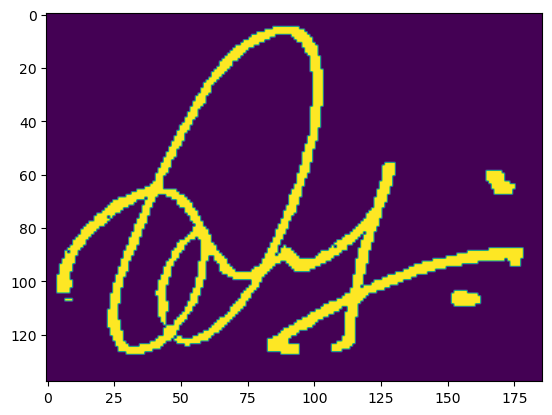

True

In [16]:
import cv2
import matplotlib.pyplot as plt
import os
img = cv2.imread("D:/lib/signature/template/person_91.jpg",cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(img,100,200)
contours,hierarchy=cv2.findContours(edge,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours,-1,(0, 255, 0),1)
ret,img1=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(img1)
plt.show()
directory = r'D:\lib\signature\template\updated'
os.chdir(directory)
cv2.imwrite("person91.jpg",img1)

# cropping

(204, 266, 3)


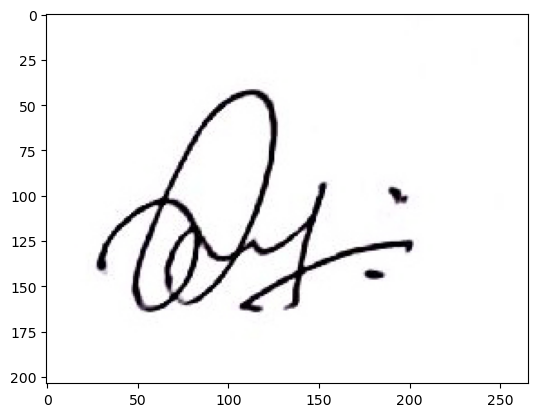

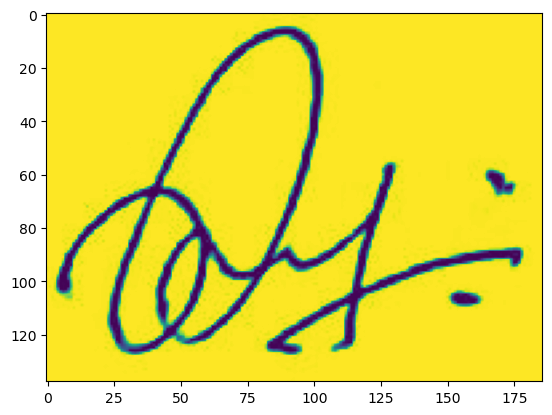

Before saving image:
After saving image:


In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
img = cv2.imread('D:/lib/signature/smalldata/10/17.jpg')
print(img.shape) # Print image shape
plt.imshow(img)
plt.show()
# Cropping an image
cropped_image = img[37:175, 24:210]
cropped_image=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
# Display cropped image
plt.imshow(cropped_image)
plt.show()
# Save the cropped image
directory = r'D:\lib\signature\template'
os.chdir(directory)
print("Before saving image:")  
#print(os.listdir(directory))
cv2.imwrite("person_10.jpg",cropped_image)
print("After saving image:")
#print(os.listdir(directory))

# template matching

-0.060201432555913925 0.3295295238494873 (122, 47) (46, 52)
Template found at location: 0.3295295238494873


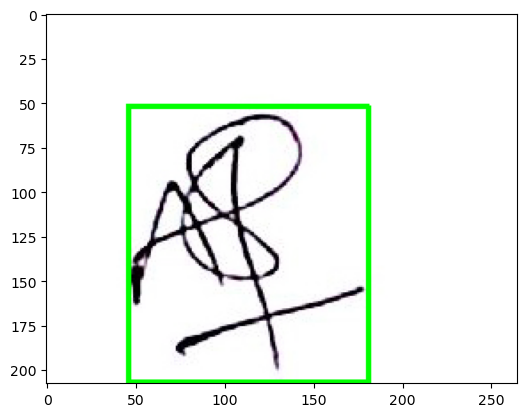

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
search_image = cv2.imread('D:/lib/signature/Test/1.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread('D:/lib/signature/template/person_1.jpg')
result = cv2.matchTemplate(search_image, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(min_val,max_val, min_loc, max_loc)
threshold = 0.3
if max_val >= threshold:
    match_location=max_val
else:
    match_location=None
if match_location:
    print("Template found at location:", match_location)
else:
    print("Template not found.")
potential_matches = np.where(result >= threshold)
for pt in zip(*potential_matches[::-1]):
    cv2.rectangle(search_image,pt,(pt[0]+template.shape[1],pt[1]+template.shape[0]),(0,255, 0),1)
plt.imshow(search_image)
plt.show()

In [187]:
import cv2
import glob
res=[]
loc=glob.glob('D:/lib/signature/Test/test/*.jpg')
person=1
for j in loc:
    search_image = cv2.imread(j)
    height,width,x=search_image.shape
    path=glob.glob('D:/lib/signature/template/*.jpg')
    for i in path:
        template = cv2.imread(i)
        h,w,x=template.shape
        if h>height or w>width:
            template=cv2.resize(template,(110,90))
        else:
            pass
        result = cv2.matchTemplate(search_image, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        res.append(max_val)
    maxx=max(res)
    position=res.index(maxx)
    print('person',person,'match with',position+1)
    res.clear()
    person+=1

person 1 match with 1
person 2 match with 2
person 3 match with 3
person 4 match with 3
person 5 match with 2
person 6 match with 6
person 7 match with 7
person 8 match with 3
person 9 match with 9
person 10 match with 10


In [17]:
import cv2
import glob
res=[]
loc=glob.glob('D:/lib/signature/Test/test/*.jpg')
person=1
for j in loc:
    search_image = cv2.imread(j)
    height,width,x=search_image.shape
    path=glob.glob('D:/lib/signature/template/updated/*.jpg')
    for i in path:
        template = cv2.imread(i)
        h,w,x=template.shape
        if h>height or w>width:
            template=cv2.resize(template,(110,90))
        else:
            pass
        result = cv2.matchTemplate(search_image, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        res.append(max_val)
    maxx=max(res)
    position=res.index(maxx)
    print('person',person,'match with',position+1)
    res.clear()
    person+=1

person 1 match with 9
person 2 match with 4
person 3 match with 10
person 4 match with 2
person 5 match with 2
person 6 match with 2
person 7 match with 7
person 8 match with 2
person 9 match with 2
person 10 match with 9
